In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def augment(data):
    aug = np.concatenate([
        data,
        np.rot90(data, k=1, axes=(1,2)),
        np.rot90(data, k=2, axes=(1,2)),
        np.rot90(data, k=3, axes=(1,2))
    ])
    return np.concatenate([aug, np.fliplr(aug)])

## Convalaria

In [3]:
from tifffile import imread
data = imread('../data/Convallaria_diaphragm/20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')

In [4]:
data.shape

(100, 1024, 1024)

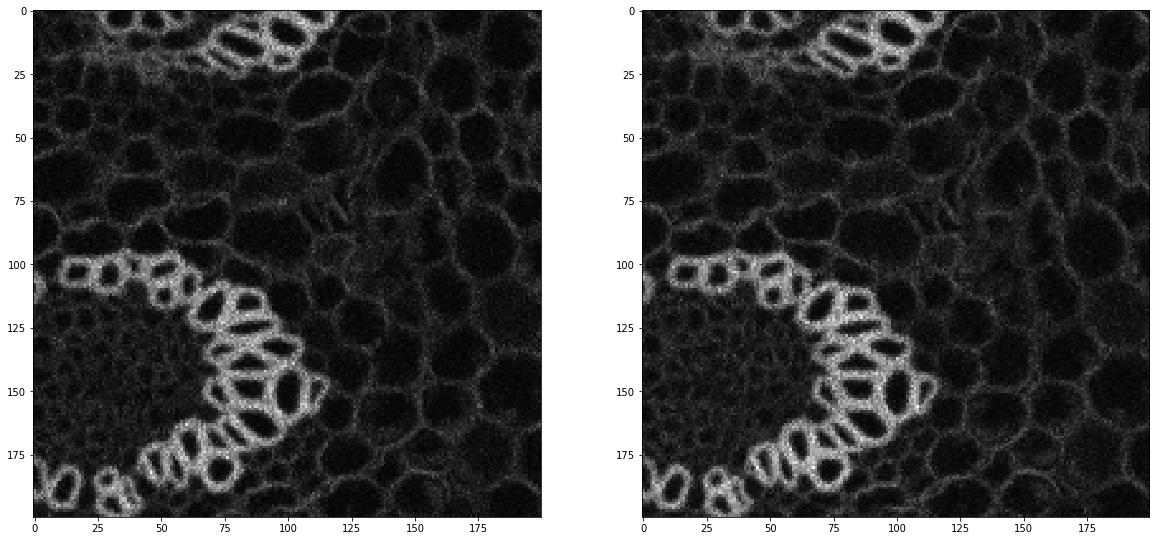

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(data[0, 200:400, 200:400], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(data[1, 200:400, 200:400], cmap='gray', interpolation='nearest')

Select one image as input, average all images to serve as GT.

In [6]:
np.random.seed(4072022)

In [7]:
i = np.random.randint(0, 100)
print(i)

19


In [8]:
patches = []
for y in range(0, 1024, 128):
    for x in range(0, 1024, 128):
        patches.append(data[:, y:y+128, x:x+128])
patches = np.array(patches)

In [9]:
len(patches)

64

In [10]:
patch_idx = np.random.permutation(len(patches))

In [11]:
print(patch_idx)

[13 39 61 44 11  1 47 54  5 20 52 31 62  8 17 26 34 53  0 15 56 21 51 42
 49 10 33 30 28 27 14 18 63 60 32  4 38 22 23  7 55  3 36 19 50 48 40 43
 35 16 41 37 59  6  2 25 58 45 46 24 29 57  9 12]


In [12]:
print("Train:", patch_idx[:56])
print("Val:", patch_idx[56:60])
print("Test:", patch_idx[60:])

Train: [13 39 61 44 11  1 47 54  5 20 52 31 62  8 17 26 34 53  0 15 56 21 51 42
 49 10 33 30 28 27 14 18 63 60 32  4 38 22 23  7 55  3 36 19 50 48 40 43
 35 16 41 37 59  6  2 25]
Val: [58 45 46 24]
Test: [29 57  9 12]


In [13]:
train = augment(np.array([patches[j][i] for j in patch_idx[:56]])[..., np.newaxis])
val = np.array([patches[j][i] for j in patch_idx[56:60]])[..., np.newaxis]
test = np.array([patches[j][i] for j in patch_idx[60:]])[..., np.newaxis]
test_gt = np.array([np.mean(patches[j], axis=0) for j in patch_idx[60:]])[..., np.newaxis]

In [14]:
print(train.shape)
print(val.shape)
print(test.shape, test_gt.shape)

(448, 128, 128, 1)
(4, 128, 128, 1)
(4, 128, 128, 1) (4, 128, 128, 1)


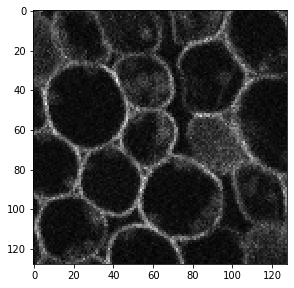

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(train[0,...,0], cmap='gray', interpolation='nearest')

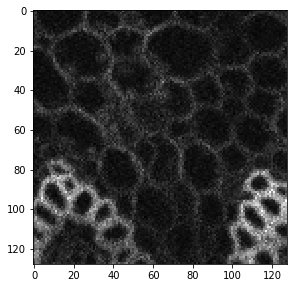

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(val[0,...,0], cmap='gray', interpolation='nearest')

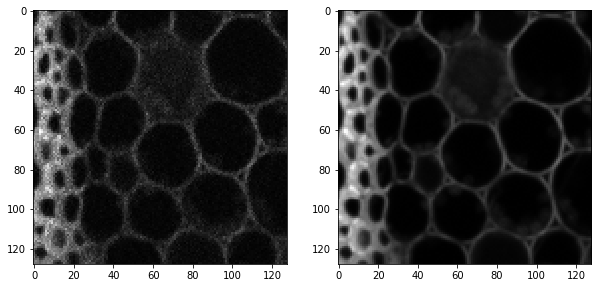

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(test[0,...,0], cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(test_gt[0,...,0], cmap='gray', interpolation='nearest')

In [18]:
print(train.min(), train.max())
print(val.min(), val.max())
print(test.min(), test.max())

345 5896
362 5117
363 6016


In [19]:
np.savez('../data/convallaria_v1/convallaria_v1_train.npz', x_train=train)
np.savez('../data/convallaria_v1/convallaria_v1_val.npz', x_val=val)
np.savez('../data/convallaria_v1/convallaria_v1_test.npz', x_test=test, gt_test=test_gt)
np.savez('../data/convallaria_v1/convallaria_v1_full.npz', full=data)